In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
from scipy.integrate import ode

99


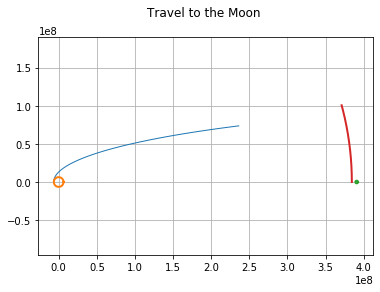

[-1.48341559e+08] [73618154.19309863]
100000.0


In [47]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
from scipy.integrate import ode


h=200000       #Orbit height
Re=6371000     #Earth radius
Rm=1738000     #Earth radius   
Rem=3844e5     #Moon orbit radius
G=6.67e-11
Me=5.97e24     #Earth mass
Mm=7.36e22     #Moon mass

T=0#544450#Flight time
Vm=m.sqrt(G*Me/(Rem))

V0=m.sqrt(G*Me/(Re+h))*1.41

def fout(t, y):# обработчик шага 
    ts.append(t)
    ys.append(list(y.copy()))
    y1, y2, y3, y4 = y

    if (m.sqrt((Rem-y1)**2+y3**2) < (Rm+3850)):
        print("TRUE")
        return -1

def distToMoon(x,y,tm):
    xm, ym=Moonpos(tm)
    return m.sqrt((y-ym)**2+(x-xm)**2)
 
def Moonpos(tm):
    omega=Vm/Rem
    xm=Rem*m.cos(omega*(-T+tm))
    ym=Rem*m.sin(omega*(-T+tm))
    return xm,ym
    
        
# функция правых частей системы ОДУ
def f(t, y):
    ''' Функция правых частей системы ОДУ 
        y1->X; y3->Y; y2->Vx; y4->Vy '''
    
    y1, y2, y3, y4 = y 
    xm, ym=Moonpos(t)
    
    ax = -y1 * G*Me / ((y1**2+y3**2)**1.5) + (xm - y1) * G*Mm / (distToMoon(y1, y3, t)**3)
    ay = -y3 * G*Me / ((y1**2+y3**2)**1.5) - (y3 - ym) * G*Mm / (distToMoon(y1, y3, t)**3)
    
    return [y2, ax, y4, ay] 
     
tmax=100000         # максимально допустимый момент времени

y0,t0=[-Re - h, 0, 0, V0*1.001], 0 # начальные условия 
ODE=ode(f)
ODE.set_integrator('dopri5', max_step=1400)
ODE.set_solout(fout)


fig, ax = plt.subplots()

ts, ys = [ ],[ ]
ODE.set_initial_value(y0, t0) 
ODE.integrate(tmax) 
     # решение ОДУ
Y=np.array(ys)

xc,yc=[],[]
for i in range(0, 630):
    xc.append(Re*m.cos(i/100))
    yc.append(Re*m.sin(i/100))


print(len(Y))
plt.plot(Y[:,0],Y[:,2],linewidth=1)#,label='k=%.1f'% k)
plt.axis('equal')
plt.plot(xc,yc,linewidth=2)

xc,yc=[],[]
for i in range(0, 630):
    xc.append(Re + Rem + Rm*m.cos(i/100))
    yc.append(Rm*m.sin(i/100))

plt.plot(xc,yc,linewidth=2)

xc,yc=[],[]
for t in range(1, tmax):
    x_temp, y_temp = Moonpos(t)
    xc.append(x_temp)
    yc.append(y_temp)
plt.plot(xc[len(xc) - 1000000:],yc[len(xc) - 1000000:],linewidth=2)    

plt.title("Travel to the Moon \n ")
plt.grid(True)

  
plt.show()
print(Y[-1:,0]-Rem,Y[-1:,2])
print(ts[-1]);